### Разработка алгоритма для построения сетки.

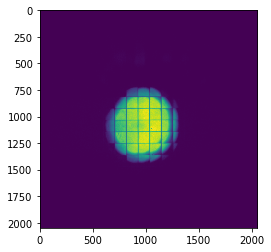

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import sys
sys.path.append("../") 
from wfslib.geometry import Geometry
from wfslib.wfs import WFSData

path1 = "data/bad_img.tiff"
path2 = "data/bad_img2.tiff"
path3 = "data/bad_img3.tiff"

arr = np.array(Image.open(path3))
arr = np.expand_dims(arr, 0)
# wfs = WFSData(arr)
# wfs.geometry.set_options(shift=(2, 2))

plt.imshow(arr[0])
# wfs.show_geometry()

### Фурье для данных

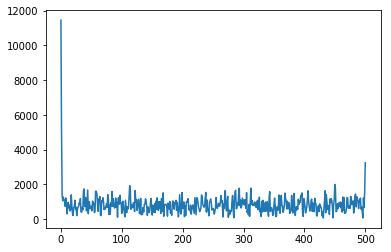

In [10]:
plt.plot(abs(np.fft.rfft(arr[0][0:,0])));

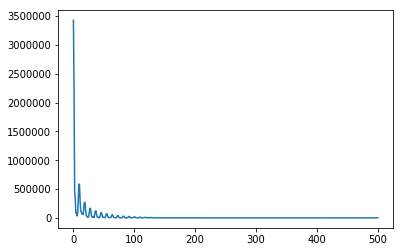

In [4]:
plt.plot(abs(np.fft.rfft(np.mean(arr[0],axis = 0))));

### Среднее по одной оси по данным

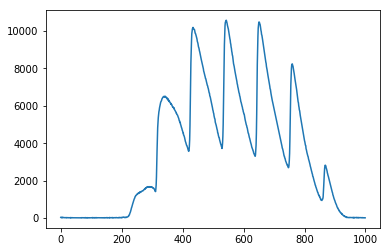

In [4]:
plt.plot(np.mean(arr[0],axis = 1));

In [100]:
import h5py
h5f = h5py.File('one_frame.h5','r')
data = h5f['image'][:]

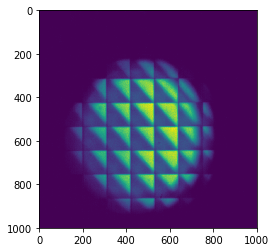

In [6]:
plt.imshow(arr[0])

### Вейвлет преобразования для данных

In [8]:
import pywt
coeffs = pywt.wavedec(np.mean(arr[0],axis = 0), 'db2', level = 5)   
ca, cd = coeffs[0],coeffs[1:]  

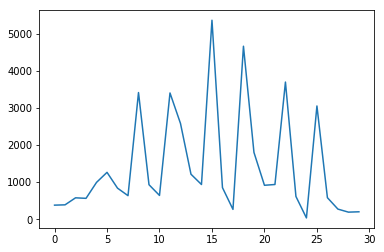

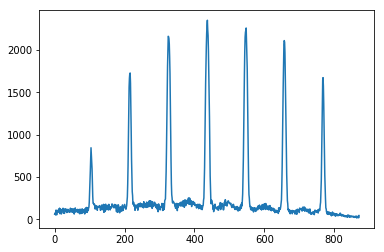

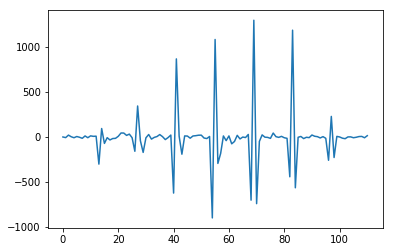

In [9]:
plt.plot(ca)
plt.show()
plt.plot(np.mean(arr[0],axis = 0))
plt.show()
plt.plot(cd[2])
plt.show()

### Выбор точек, по которым будет вычисляться сетка

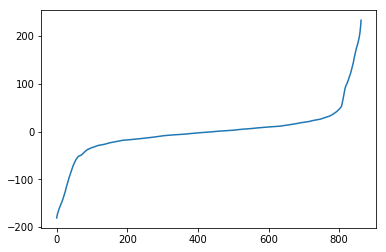

In [14]:
def moving_average(a, n=10) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

sort_sig =moving_average(sorted(cwtmatr[0]))
# plt.plot(sort_sig[10:120])
plt.plot(sort_sig)

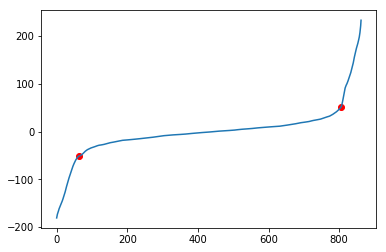

In [16]:
std = np.std(sort_sig)
mask_1 = np.where(sort_sig > std)[0]
mask_2 = np.where(sort_sig < -std)[0]
plt.plot(sort_sig)
plt.scatter(mask_1[0],sort_sig[mask_1[0]], color = 'r')
plt.scatter(mask_2[-1],sort_sig[mask_2[-1]], color = 'r')

In [39]:

d = arr[0]
coeffs = pywt.wavedec(np.mean(d,axis = 0), 'db2', level = 10)   
ca, cd = coeffs[0],coeffs[1:]   

C:\Users\Zoya\Anaconda3\lib\site-packages\pywt\_multilevel.py:45: UserWarning: Level value of 10 is too high: all coefficients will experience boundary effects.
  "boundary effects.").format(level))


In [40]:
def cell_width(extremums):
    widths = []
    for i in range(1,len(extremums)):
        widths.append(extremums[i]-extremums[i-1])

    return widths
    

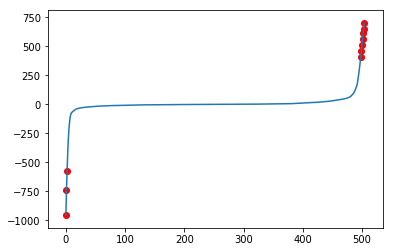

In [61]:
dat = cd[8]
sort_sig =moving_average(sorted(dat))

std = np.std(sort_sig)
std_max = np.mean([std, np.max(sort_sig)])
std_min = np.mean([-std, np.min(sort_sig)])

mask_1 = np.where(sort_sig > std_max)[0]
mask_2 = np.where(sort_sig < std_min)[0]
plt.plot(sort_sig)


plt.scatter(mask_1,sort_sig[mask_1], color = 'r')
plt.scatter(mask_2,sort_sig[mask_2], color = 'r')



[25, 3, 24, 3, 24, 1, 2, 1, 24, 3, 27]
[27, 27, 1, 27, 27, 28]


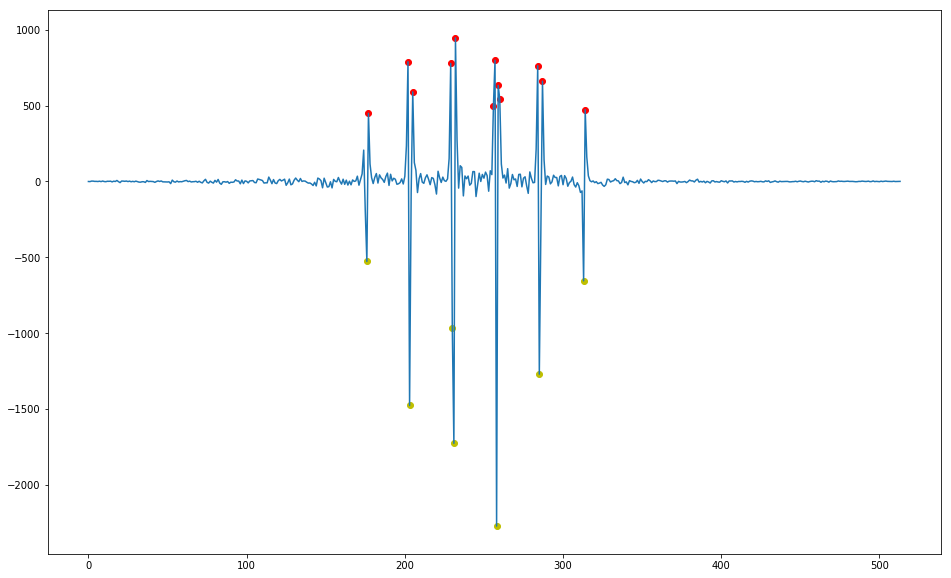

In [62]:

mask1 = np.where(dat > std_max)[0]
mask2 = np.where(dat < std_min)[0]

plt.figure(figsize = (16,10))
plt.plot(dat)
plt.scatter(mask1, dat[mask1], color = 'r')
plt.scatter(mask2, dat[mask2], color = 'y')

print(cell_width(mask1))
print(cell_width(mask2))

In [162]:
center

5